# Data Set Information

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Attribute Information:

* compactness: (average perim)^2/area
* circularity: (average radius)^2/area
* distance_circularity: area/(av.distance from border)^2
* radius_ratio: (max.rad-min.rad)/av.radius
* pr.axis_aspect_ratio: (minor axis)/(major axis)
* max.length_aspect_ratio: (length perp. max length)/(max length)
* scatter_ratio: (inertia about minor axis)/(inertia about major axis)
* elongatedness: area/(shrink width)^2
* pr.axis_rectangularity: area/(pr.axis length*pr.axis width)
* max.length_rectangularity: area/(max.length*length perp. to this)
* scaled_variance: (2nd order moment about minor axis)/area along major axis
* scaled_variance.1: (2nd order moment about major axis)/area along minor axis
* scaled_radius_of_gyration: (mavar+mivar)/area
* scaled_radius_of_gyration.1
* skewness_about: (3rd order moment about major axis)/sigma_min^3 major axis
* skewness_about.1: (3rd order moment about minor axis)/sigma_maj^3 minor axis
* skewness_about.2
* hollows_ratio: (area of hollows)/(area of bounding polygon)
* class: van, car, bus


Where sigma_maj^2 is the variance along the major axis and sigma_min^2 is the variance along the minor axis, and area of hollows = area of bounding poly-area of object

# Importng Libraries

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#importing svm 
from sklearn.svm import SVC

# importing GridSearchcv
from sklearn.model_selection import GridSearchCV

#importing kfold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#metrics
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, auc
from sklearn.utils import resample
from sklearn import preprocessing



random_state = 42
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Reading Data

We read the csv file given into a dataframe

In [2]:
data = pd.read_csv("vehicle-1.csv")

In [3]:
print('The shape of the data is',data.shape)

The shape of the data is (846, 19)


# 1. Understanding data - Data Preprocessing

In [4]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [5]:
data.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

As we can see there are some missing values in our dataset and they have to be handled before machine learning algorithm are applied

In [7]:
# Check for any Non-Real value present in the dataset such as '?' or '*' etc.
data[~data.iloc[:,:-1].applymap(np.isreal).all(1)]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [8]:
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Observation:
* There are some missing values and these have to be taken care of before training
* Null values are present in circularity, diatance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2                  

# 1.1 Replacing Null values with Median of that respective attribute

In [9]:
nulls = data.isnull().sum()
nulls[nulls > 0]
data.fillna(data.median(), inplace=True)

In [10]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# 1.2 Looking for Outliers

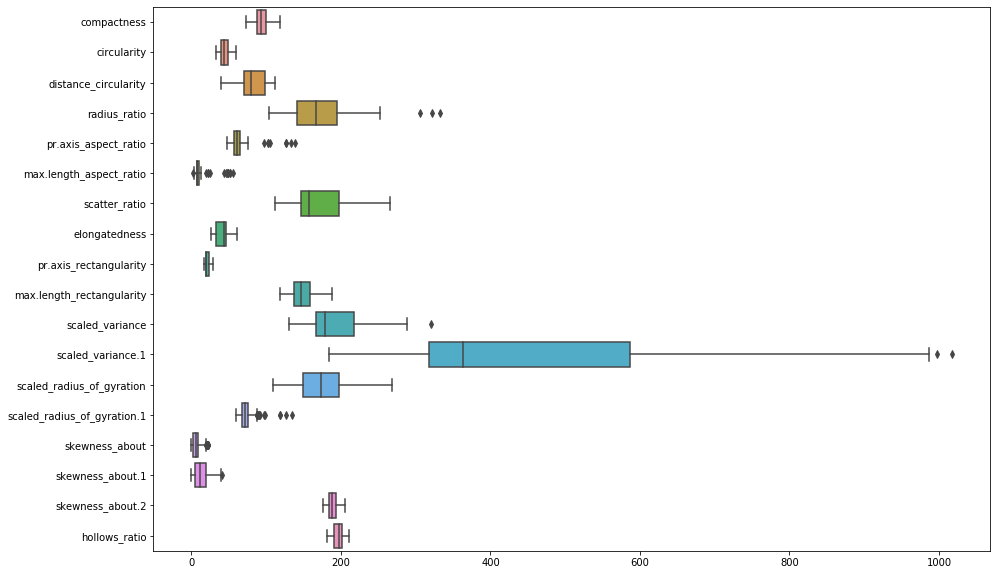

In [11]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 10))
ax = sns.boxplot(data = data.iloc[:, 0:18], orient = 'h')

As we can see, there are outliers

# 1.3 Counting the number of outliers

In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [13]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

circularity                     0
class                           0
compactness                     0
distance_circularity            0
elongatedness                   0
hollows_ratio                   0
max.length_aspect_ratio        13
max.length_rectangularity       0
pr.axis_aspect_ratio            8
pr.axis_rectangularity          0
radius_ratio                    3
scaled_radius_of_gyration       0
scaled_radius_of_gyration.1    15
scaled_variance                 1
scaled_variance.1               2
scatter_ratio                   0
skewness_about                 12
skewness_about.1                1
skewness_about.2                0
dtype: int64

# 1.4 Handling Outliers

In [14]:
for idx, col in enumerate(data.columns[:-1]):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    low = q1 - 1.5*(q3 - q1)
    high = q3 + 1.5*(q3 - q1)
    data = data[(data[col] < high) & (data[col] > low)]

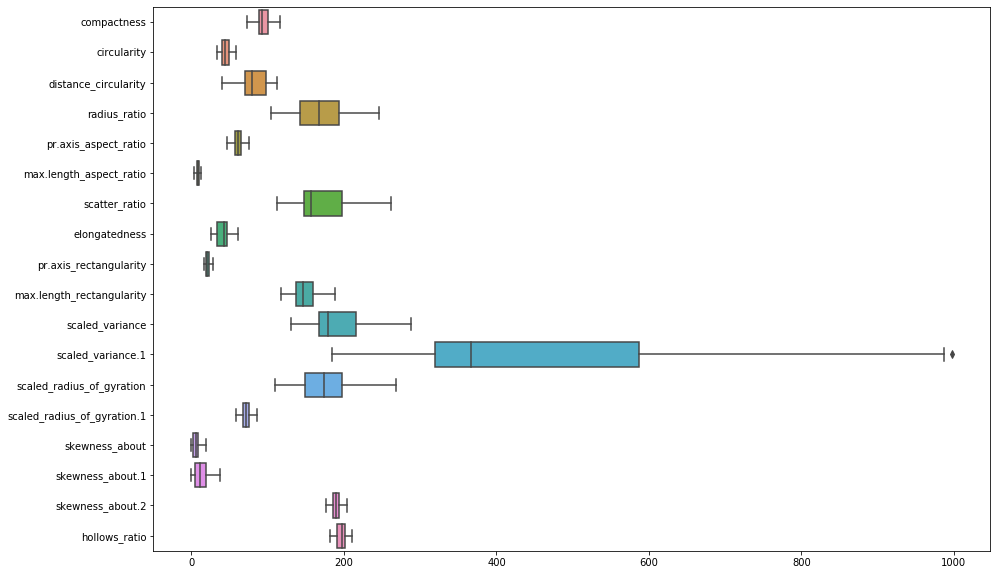

In [15]:
# Boxplot after removing outliers
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 10))
ax = sns.boxplot(data = data.iloc[:, 0:18], orient = 'h')

* There is one outlier in scaled_variance.1, but this can be ignored because it is just one outlier

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 845
Data columns (total 19 columns):
compactness                    801 non-null int64
circularity                    801 non-null float64
distance_circularity           801 non-null float64
radius_ratio                   801 non-null float64
pr.axis_aspect_ratio           801 non-null float64
max.length_aspect_ratio        801 non-null int64
scatter_ratio                  801 non-null float64
elongatedness                  801 non-null float64
pr.axis_rectangularity         801 non-null float64
max.length_rectangularity      801 non-null int64
scaled_variance                801 non-null float64
scaled_variance.1              801 non-null float64
scaled_radius_of_gyration      801 non-null float64
scaled_radius_of_gyration.1    801 non-null float64
skewness_about                 801 non-null float64
skewness_about.1               801 non-null float64
skewness_about.2               801 non-null float64
hollows_ratio    

# 2. Understanding the Attributes/columns

# 2.1 5 - Point Summary

In [17]:
# Five point summary
data.describe().T

count        mean         std    min    25%  \
compactness                  801.0   93.717853    8.031207   73.0   88.0   
circularity                  801.0   44.873908    6.137820   33.0   40.0   
distance_circularity         801.0   82.409488   15.407696   40.0   70.0   
radius_ratio                 801.0  168.451935   31.322404  104.0  142.0   
pr.axis_aspect_ratio         801.0   61.263421    5.620211   47.0   57.0   
max.length_aspect_ratio      801.0    8.152310    2.032061    3.0    7.0   
scatter_ratio                801.0  169.202247   32.825852  112.0  147.0   
elongatedness                801.0   40.802747    7.708342   26.0   33.0   
pr.axis_rectangularity       801.0   20.600499    2.557870   17.0   19.0   
max.length_rectangularity    801.0  148.094881   14.490376  118.0  137.0   
scaled_variance              801.0  188.239700   30.264459  130.0  167.0   
scaled_variance.1            801.0  440.715356  174.327173  184.0  319.0   
scaled_radius_of_gyration    801.0  174.611735   32.466131  109.0  149.0   
scaled_radius_of_gyration.1  801.0   71.830212    5.986225   59.0   67.0   
skewness_about               801.0    6.219725    4.627544    0.0    2.0   
skewness_about.1             801.0   12.636704    8.831710    0.0    5.0   
skewness_about.2             801.0  189.101124    6.038502  176.0  185.0   
hollows_ratio                801.0  195.840200    7.225609  182.0  191.0   

                               50%    75%    max  
compactness                   93.0  100.0  116.0  
circularity                   44.0   49.0   59.0  
distance_circularity          80.0   98.0  112.0  
radius_ratio                 167.0  194.0  246.0  
pr.axis_aspect_ratio          61.0   65.0   76.0  
max.length_aspect_ratio        8.0   10.0   13.0  
scatter_ratio                157.0  198.0  262.0  
elongatedness                 43.0   46.0   61.0  
pr.axis_rectangularity        20.0   23.0   28.0  
max.length_rectangularity    146.0  159.0  188.0  
scaled_variance              179.0  216.0  288.0  
scaled_variance.1            366.0  587.0  998.0  
scaled_radius_of_gyration    173.5  198.0  268.0  
scaled_radius_of_gyration.1   71.0   75.0   86.0  
skewness_about                 6.0    9.0   19.0  
skewness_about.1              11.0   19.0   38.0  
skewness_about.2             189.0  193.0  204.0  
hollows_ratio                197.0  201.0  211.0

# 2.2 Univariate Analysis

We perform univariate analysis to know the distribution of independent variables.

5 Point Summary of compactness column is:
count    801.000000
mean      93.717853
std        8.031207
min       73.000000
25%       88.000000
50%       93.000000
75%      100.000000
max      116.000000
Name: compactness, dtype: float64


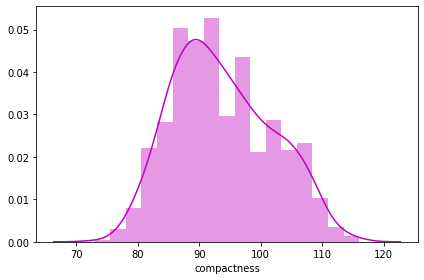

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of circularity column is:
count    801.000000
mean      44.873908
std        6.137820
min       33.000000
25%       40.000000
50%       44.000000
75%       49.000000
max       59.000000
Name: circularity, dtype: float64


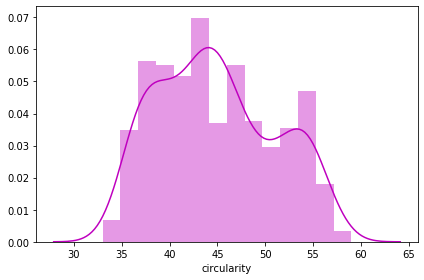

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of distance_circularity column is:
count    801.000000
mean      82.409488
std       15.407696
min       40.000000
25%       70.000000
50%       80.000000
75%       98.000000
max      112.000000
Name: distance_circularity, dtype: float64


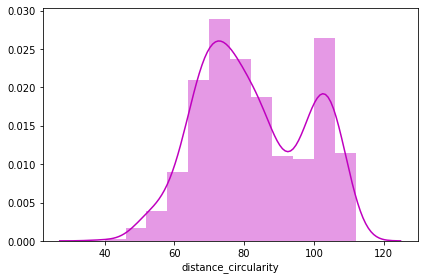

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of radius_ratio column is:
count    801.000000
mean     168.451935
std       31.322404
min      104.000000
25%      142.000000
50%      167.000000
75%      194.000000
max      246.000000
Name: radius_ratio, dtype: float64


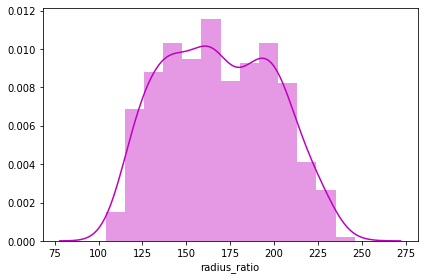

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of pr.axis_aspect_ratio column is:
count    801.000000
mean      61.263421
std        5.620211
min       47.000000
25%       57.000000
50%       61.000000
75%       65.000000
max       76.000000
Name: pr.axis_aspect_ratio, dtype: float64


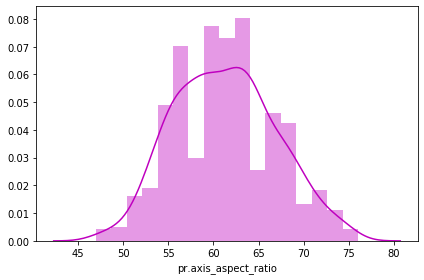

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of max.length_aspect_ratio column is:
count    801.000000
mean       8.152310
std        2.032061
min        3.000000
25%        7.000000
50%        8.000000
75%       10.000000
max       13.000000
Name: max.length_aspect_ratio, dtype: float64


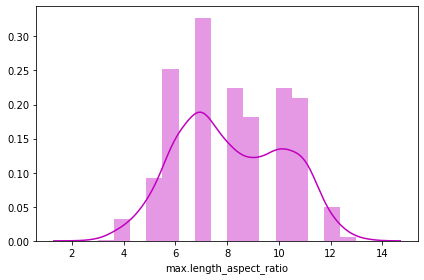

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of scatter_ratio column is:
count    801.000000
mean     169.202247
std       32.825852
min      112.000000
25%      147.000000
50%      157.000000
75%      198.000000
max      262.000000
Name: scatter_ratio, dtype: float64


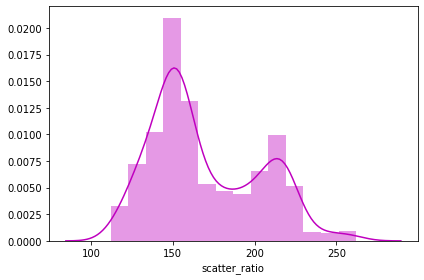

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of elongatedness column is:
count    801.000000
mean      40.802747
std        7.708342
min       26.000000
25%       33.000000
50%       43.000000
75%       46.000000
max       61.000000
Name: elongatedness, dtype: float64


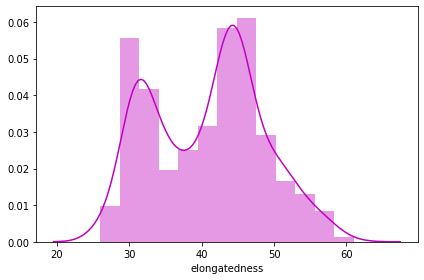

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of pr.axis_rectangularity column is:
count    801.000000
mean      20.600499
std        2.557870
min       17.000000
25%       19.000000
50%       20.000000
75%       23.000000
max       28.000000
Name: pr.axis_rectangularity, dtype: float64


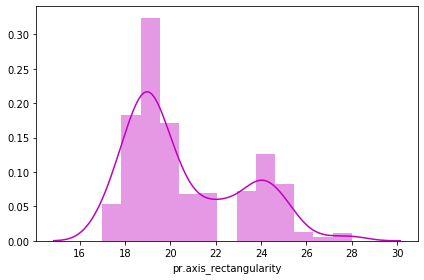

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of max.length_rectangularity column is:
count    801.000000
mean     148.094881
std       14.490376
min      118.000000
25%      137.000000
50%      146.000000
75%      159.000000
max      188.000000
Name: max.length_rectangularity, dtype: float64


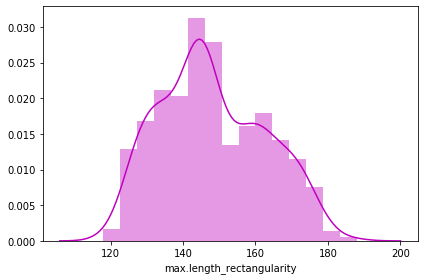

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of scaled_variance column is:
count    801.000000
mean     188.239700
std       30.264459
min      130.000000
25%      167.000000
50%      179.000000
75%      216.000000
max      288.000000
Name: scaled_variance, dtype: float64


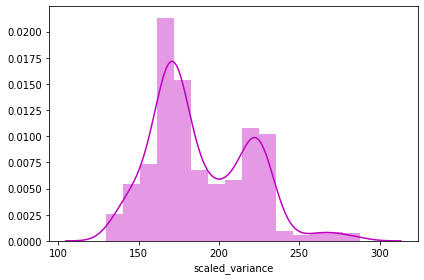

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of scaled_variance.1 column is:
count    801.000000
mean     440.715356
std      174.327173
min      184.000000
25%      319.000000
50%      366.000000
75%      587.000000
max      998.000000
Name: scaled_variance.1, dtype: float64


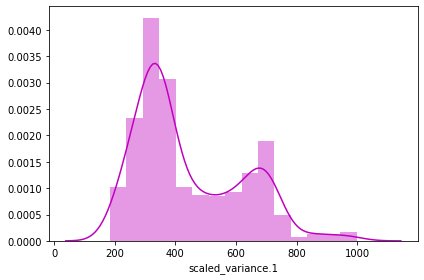

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of scaled_radius_of_gyration column is:
count    801.000000
mean     174.611735
std       32.466131
min      109.000000
25%      149.000000
50%      173.500000
75%      198.000000
max      268.000000
Name: scaled_radius_of_gyration, dtype: float64


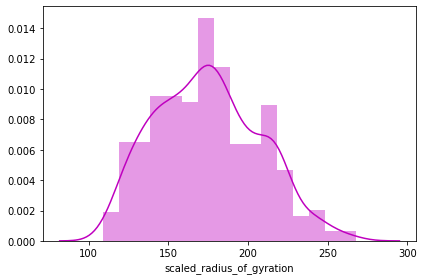

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of scaled_radius_of_gyration.1 column is:
count    801.000000
mean      71.830212
std        5.986225
min       59.000000
25%       67.000000
50%       71.000000
75%       75.000000
max       86.000000
Name: scaled_radius_of_gyration.1, dtype: float64


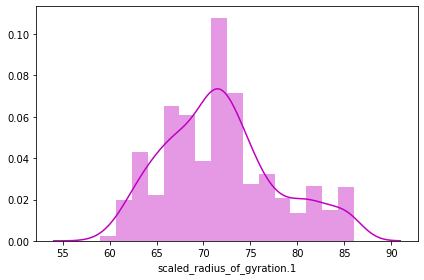

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of skewness_about column is:
count    801.000000
mean       6.219725
std        4.627544
min        0.000000
25%        2.000000
50%        6.000000
75%        9.000000
max       19.000000
Name: skewness_about, dtype: float64


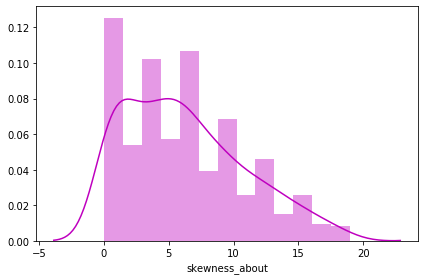

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of skewness_about.1 column is:
count    801.000000
mean      12.636704
std        8.831710
min        0.000000
25%        5.000000
50%       11.000000
75%       19.000000
max       38.000000
Name: skewness_about.1, dtype: float64


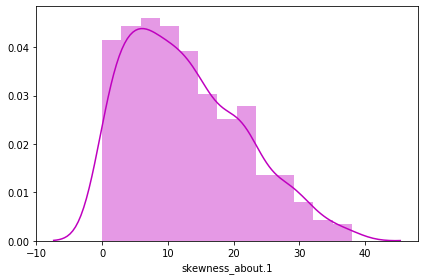

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of skewness_about.2 column is:
count    801.000000
mean     189.101124
std        6.038502
min      176.000000
25%      185.000000
50%      189.000000
75%      193.000000
max      204.000000
Name: skewness_about.2, dtype: float64


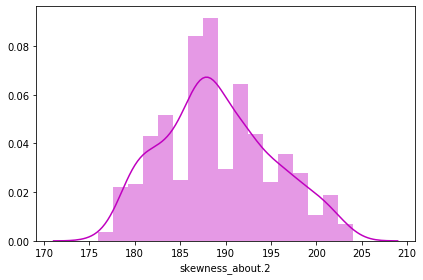

****************************************************************************************************
                                                                                                                                                                                                        
5 Point Summary of hollows_ratio column is:
count    801.000000
mean     195.840200
std        7.225609
min      182.000000
25%      191.000000
50%      197.000000
75%      201.000000
max      211.000000
Name: hollows_ratio, dtype: float64


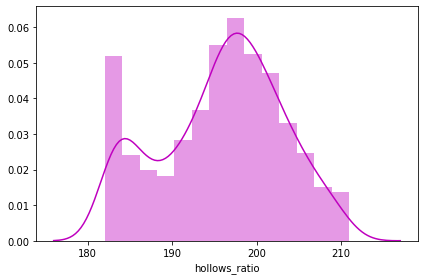

****************************************************************************************************
                                                                                                                                                                                                        


In [18]:
for i in data.columns:
    if i!='class':
        print("5 Point Summary of", i, "column is:")
        print(data[i].describe().T)
        ax = sns.distplot(data[i], color="m")
        plt.tight_layout()
        plt.show()
        print("*"*100)
        print(" "*200)

Observation:
* Most of them have two or three peaks and all are approximately normally distributed
* Also, most of them have two clear peaks
* This also indicates that we are dealing with multi class classification
* skewness_about, skewness_about.1 is right skewed

# 2.3 Bivariate Analysis

Bivariate analysis is the analysis of two variables where two variables are analysed to explore the relationship/association between them

Since All of our data is numerical, we can infer results from correlation coefficient.

# 2.4 Pair Plot

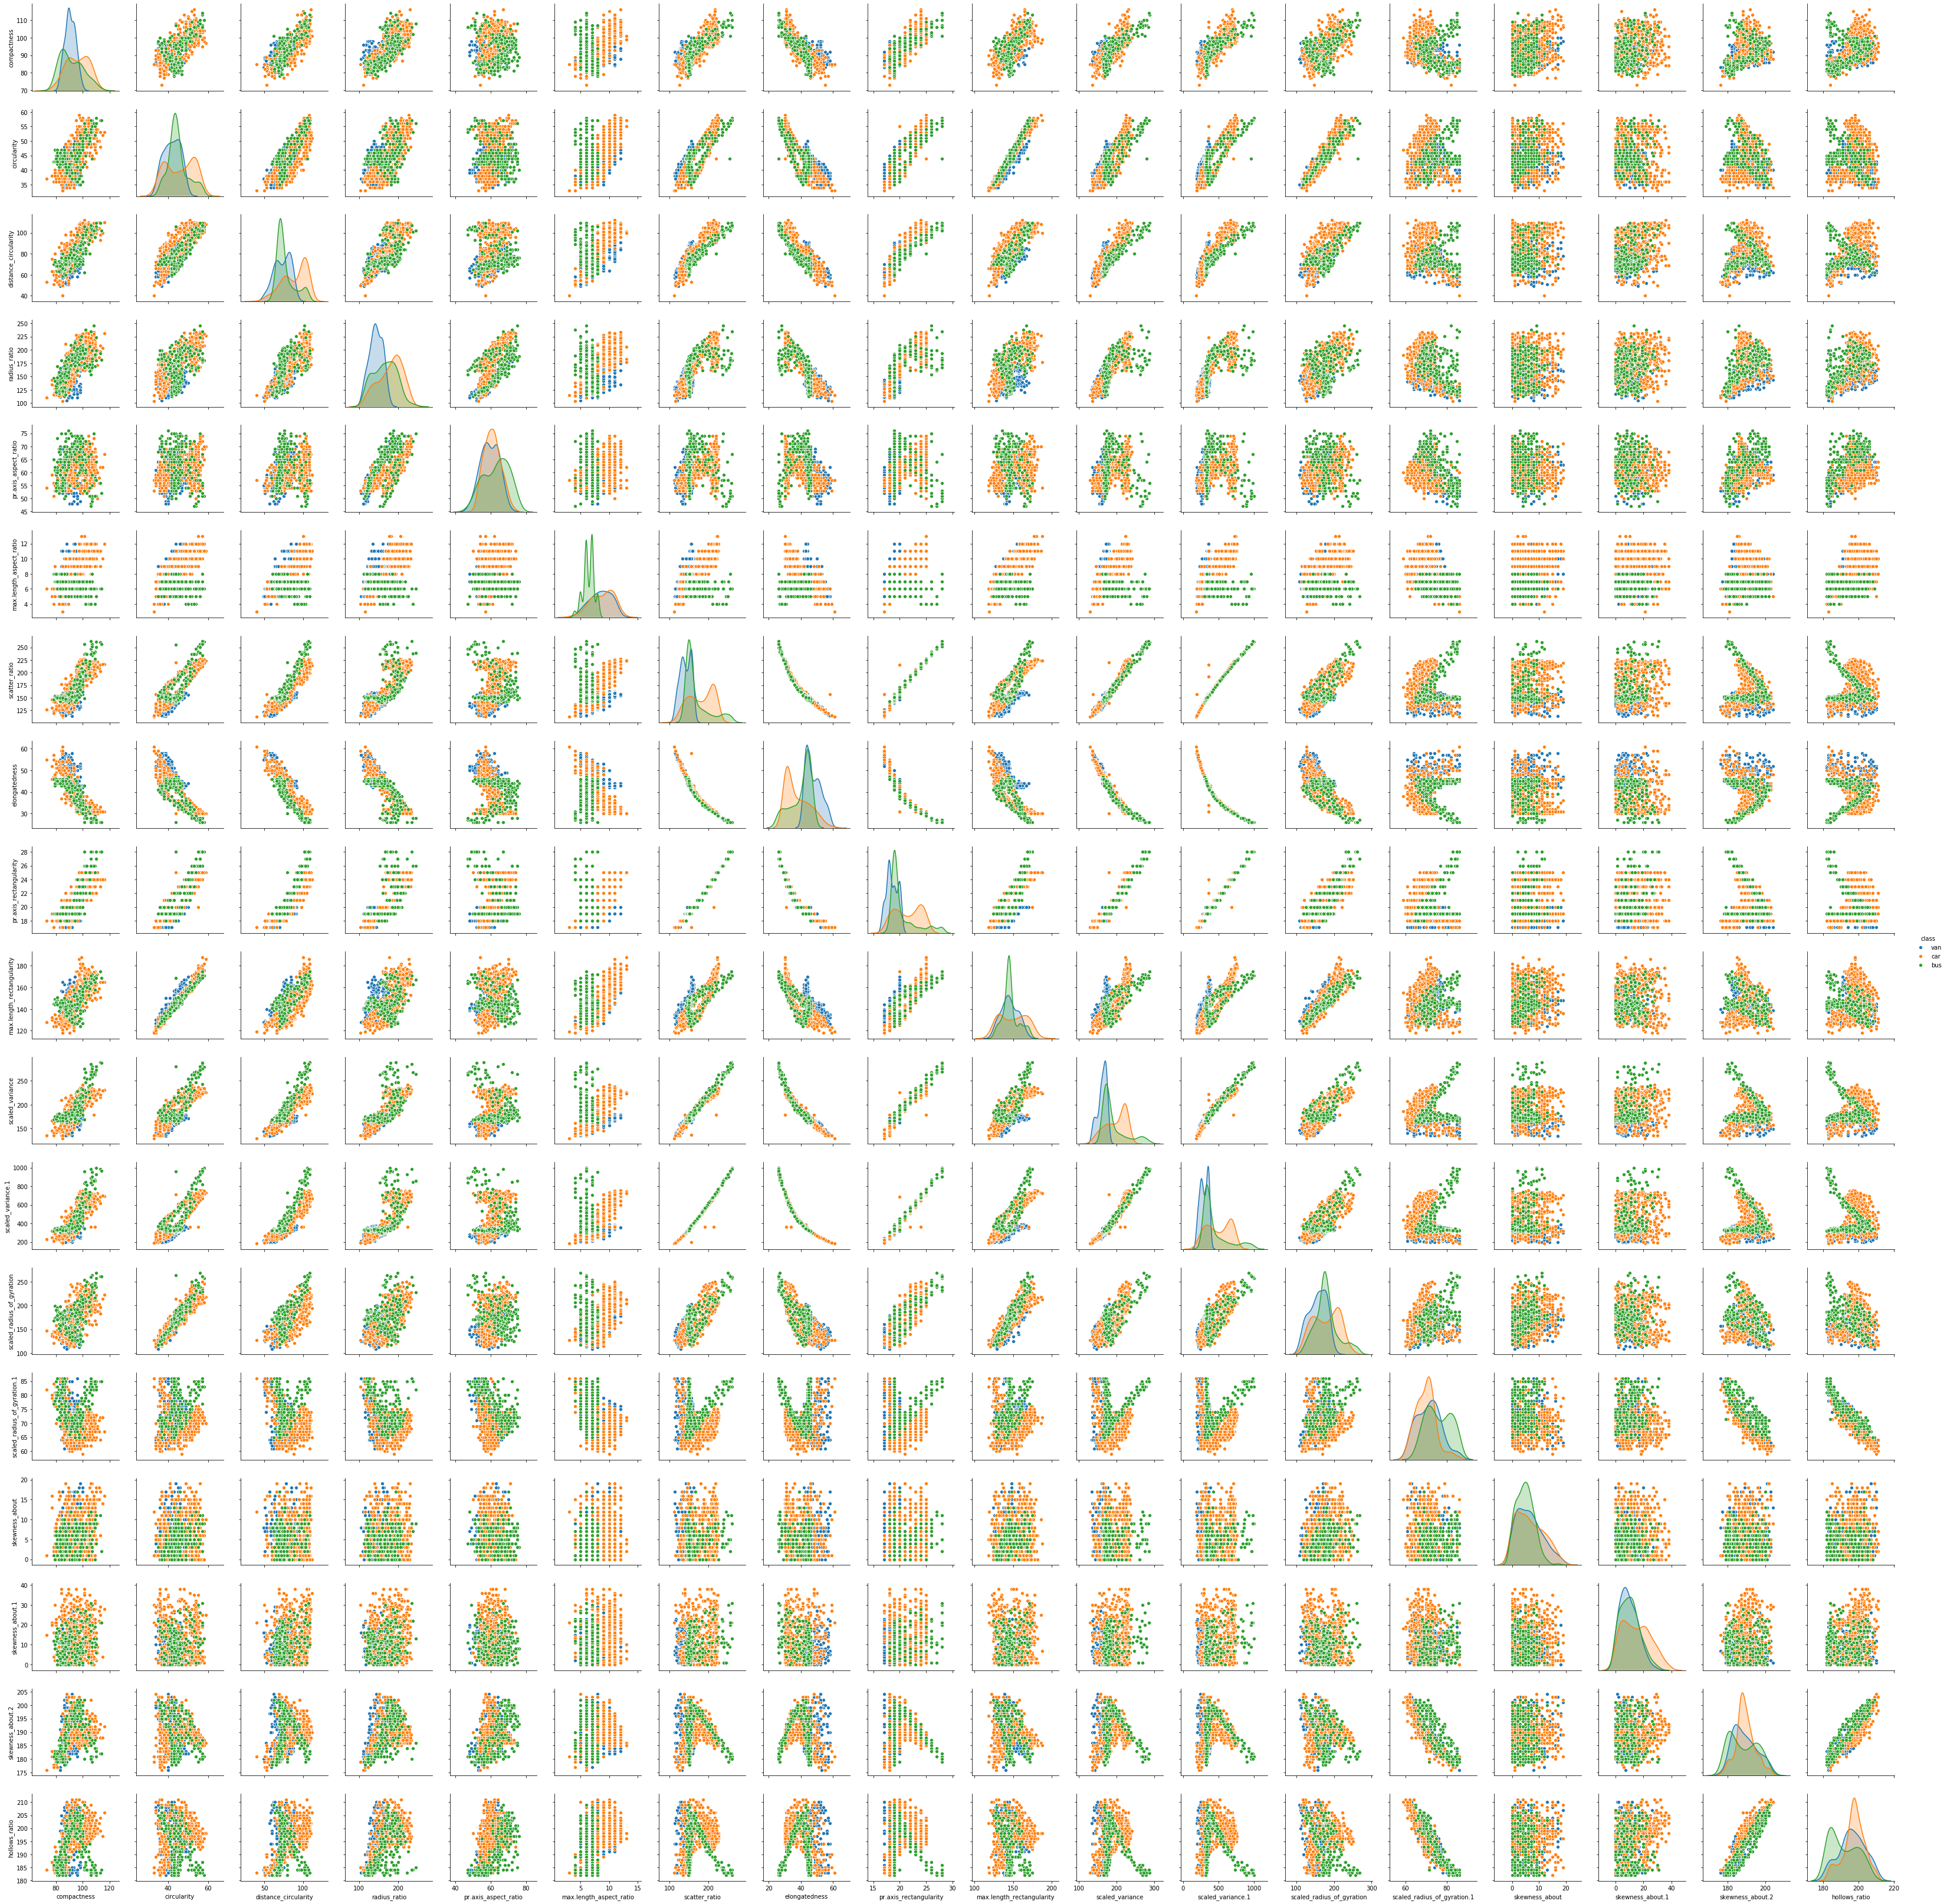

In [19]:
sns.pairplot(data, diag_kind='kde', hue = 'class')   # to plot density curve instead of histogram

Observation:
* From diagnol, we can understand why there are peaks before, during univariate distribution
* Many of the independent variables are linearly related either positively or negatively and the strength of corelation can be seen in corelation matrix

# 2.5 Corelation MAtrix

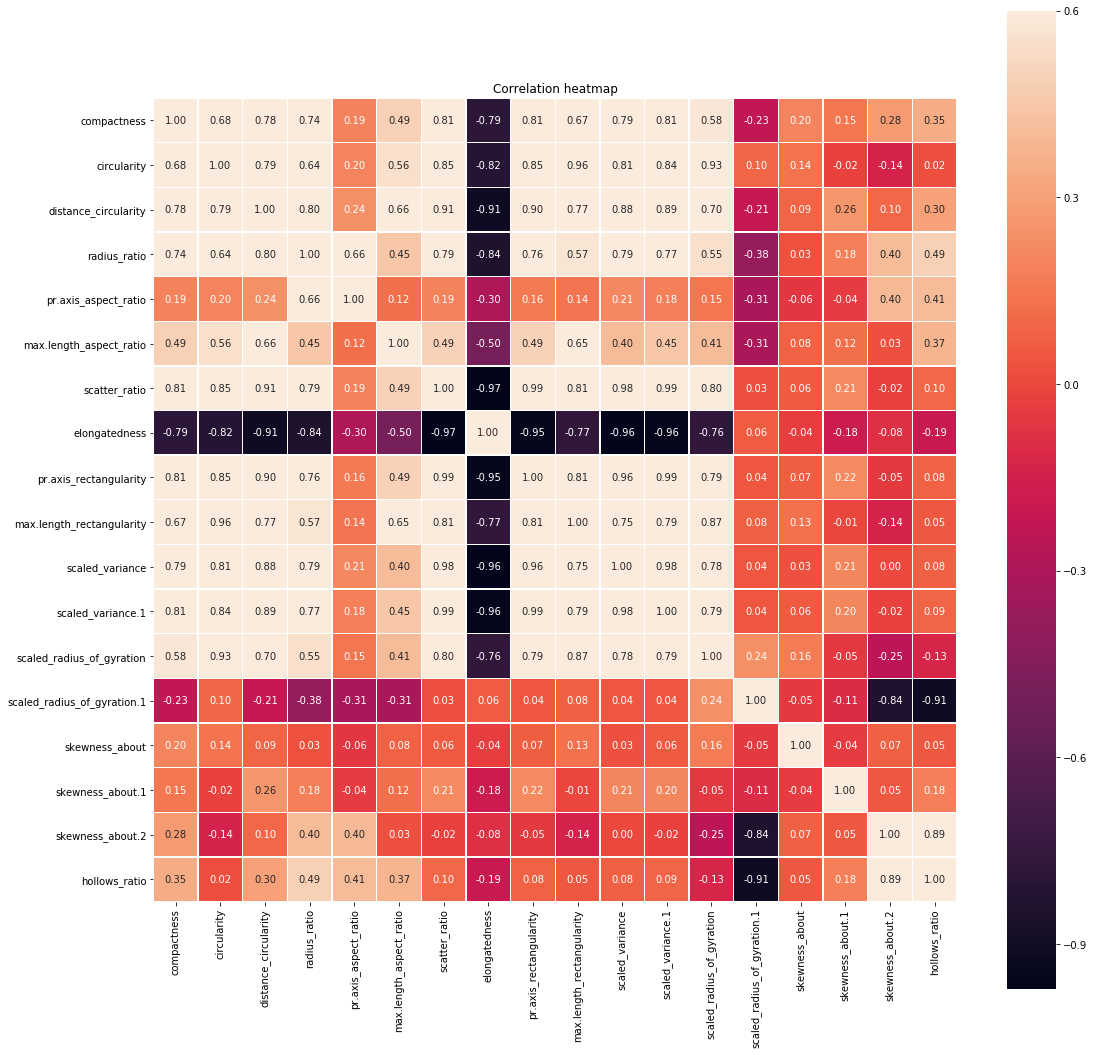

In [20]:
# Visualize the correlation among independent features
from matplotlib import pyplot as plt
plt.figure(figsize=(18,18))
ax = sns.heatmap(data.corr(), vmax=.6, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.4)
plt.title('Correlation heatmap')
plt.show()

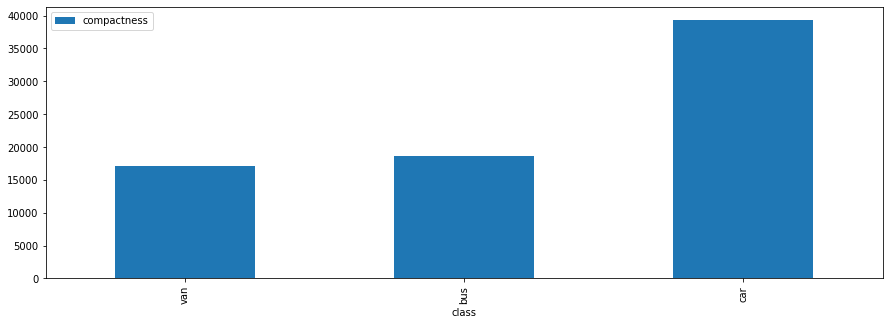

In [21]:
data.groupby(by=['class'])['compactness'].sum().reset_index().sort_values(['compactness']).tail(10).plot(x='class',y='compactness',kind='bar',figsize=(15,5))
plt.show()

# 2.6 Jointplots of few weekly corelated attributes / variables

As we can see the below plots, we can see that joint plot gives straight line parallel to x axis which indicates a week relation betweent hose two attributes

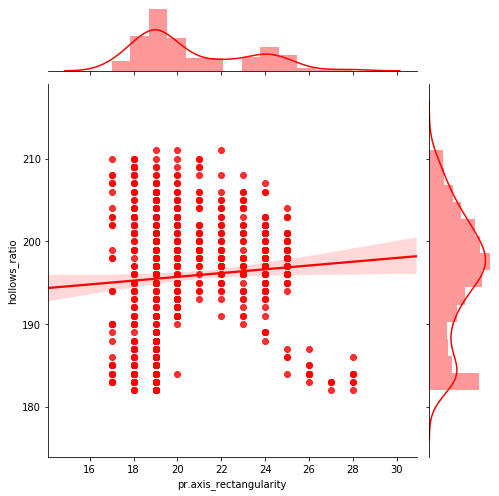

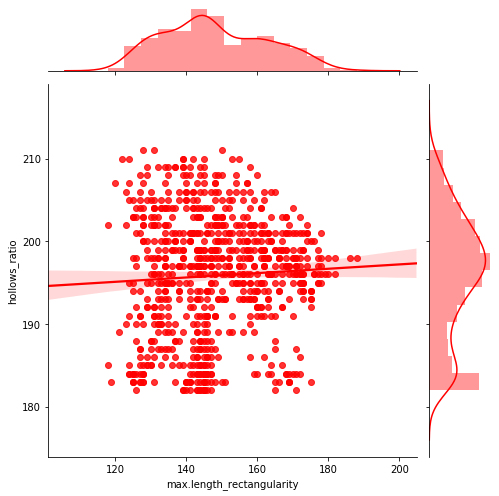

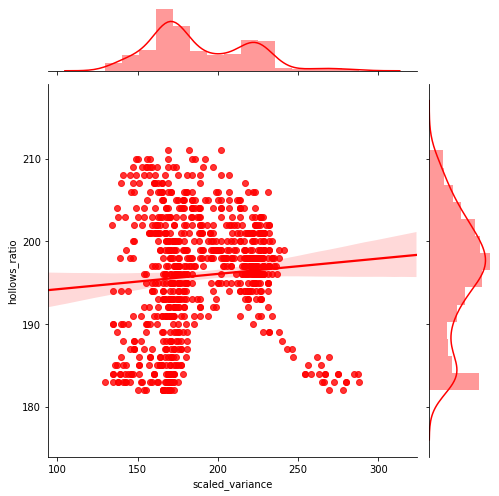

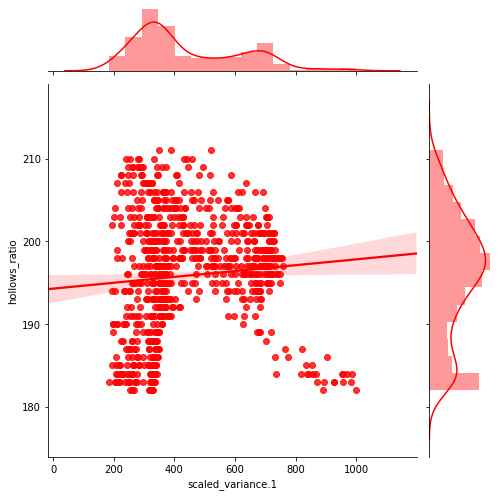

In [22]:
for i in ['pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1']:
    sns.jointplot(i, 'hollows_ratio', data, kind='reg', size=7, color='r')

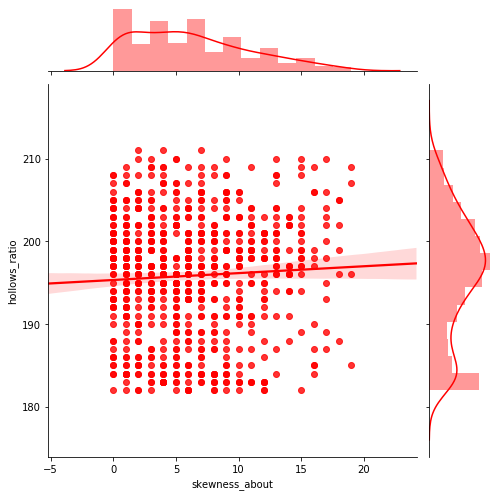

In [23]:
sns.jointplot('skewness_about', 'hollows_ratio', data, kind='reg', size=7, color='r')

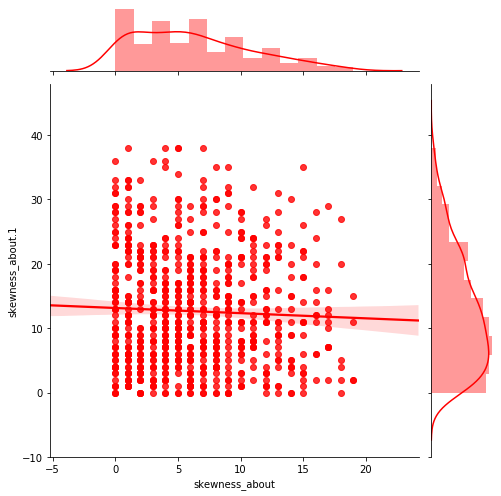

In [24]:
sns.jointplot('skewness_about', 'skewness_about.1', data, kind='reg', size=7, color='r')

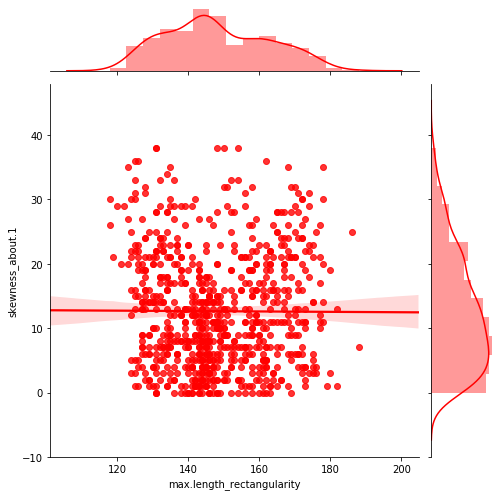

In [25]:
sns.jointplot('max.length_rectangularity', 'skewness_about.1', data, kind='reg', size=7, color='r')

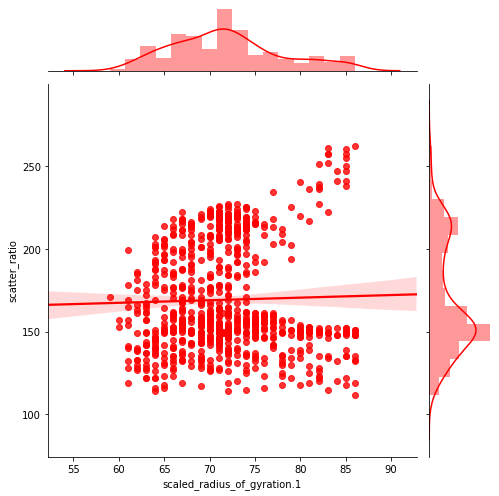

In [26]:
sns.jointplot('scaled_radius_of_gyration.1', 'scatter_ratio', data, kind='reg', size=7, color='r')

# 2.6 Jointplots of few high corelated attributes / variables

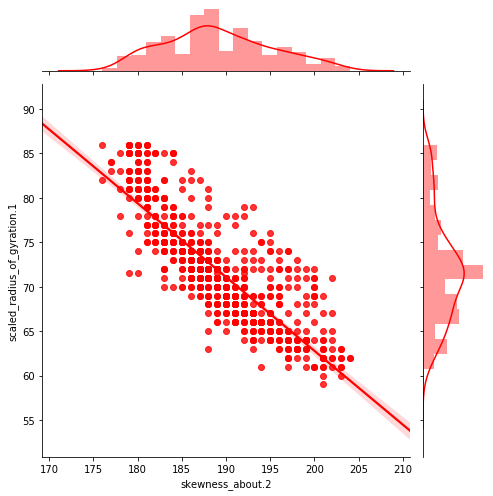

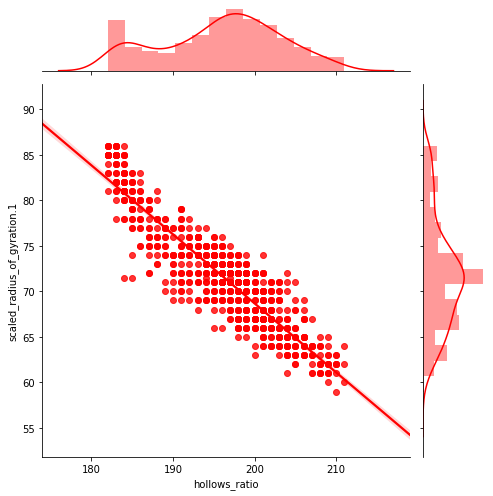

In [27]:
for i in ['skewness_about.2', 'hollows_ratio']:
    sns.jointplot(i, 'scaled_radius_of_gyration.1', data, kind='reg', size=7, color='r')

Observation:
* As we can see, elongatedness is important attribute because it gave highly negative correlation with many other attributes
* Most of the variables are related to each other, so we cannot remove any attribute out of the algorithm

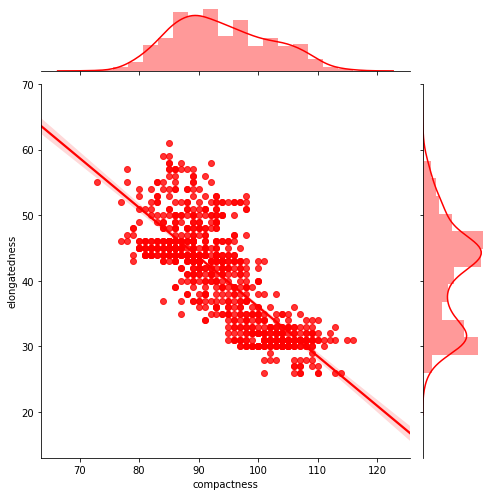

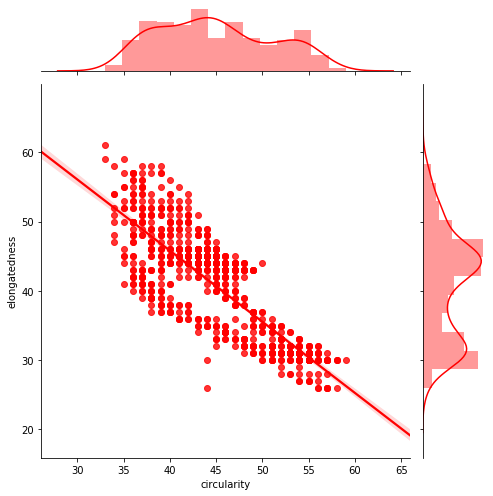

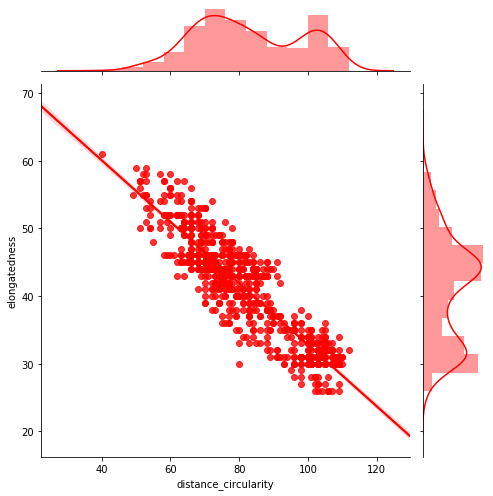

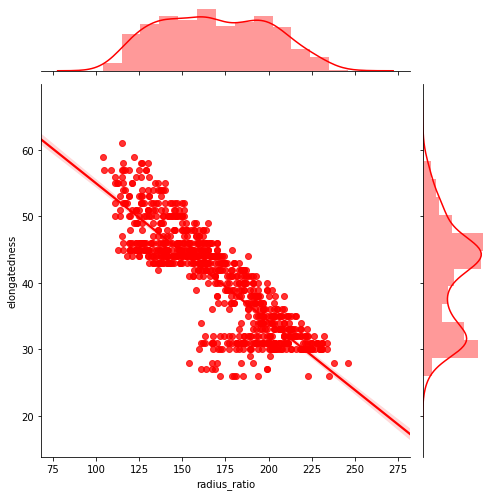

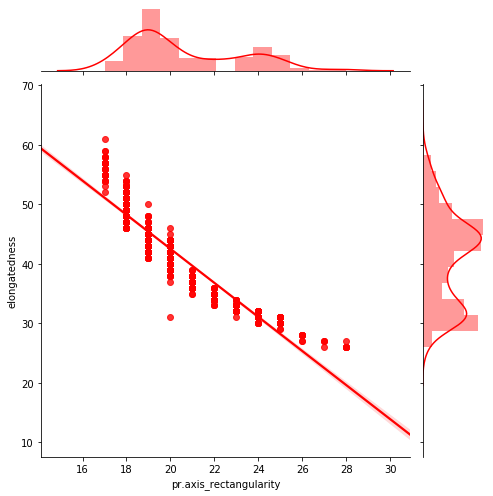

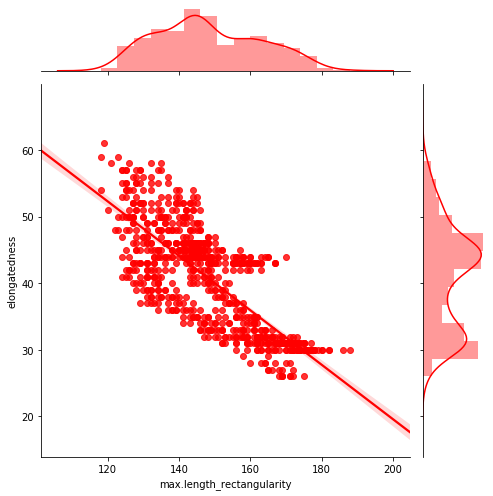

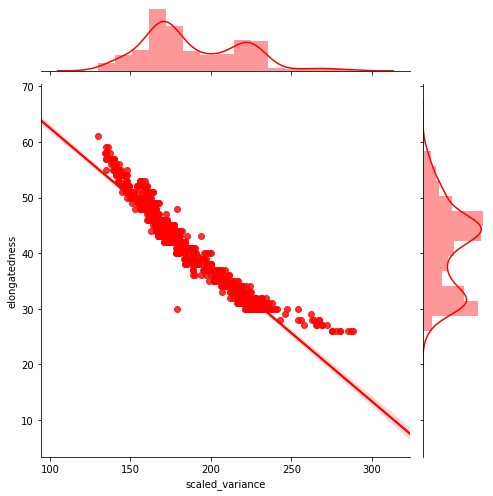

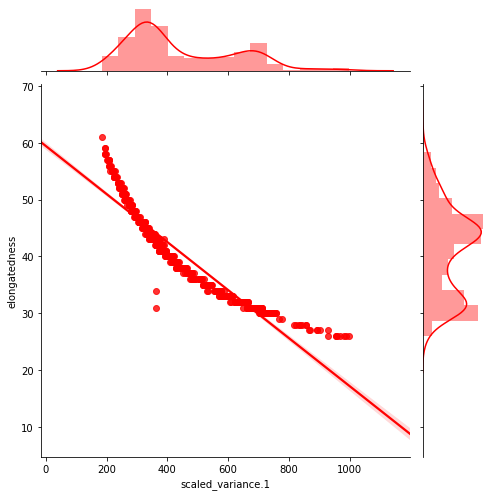

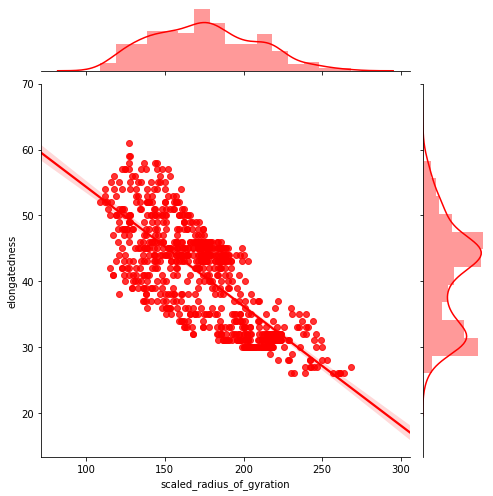

In [28]:
for i in ['compactness', 'circularity', 'distance_circularity', 'radius_ratio','pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration']:
    sns.jointplot(i, 'elongatedness', data, kind='reg', size=7, color='r')

Observation:
* Elongatedness is negatively corelated to these attributes - 'compactness', 'circularity', 'distance_circularity', 'radius_ratio','pr.axis_rectangularity', 'max.length_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'

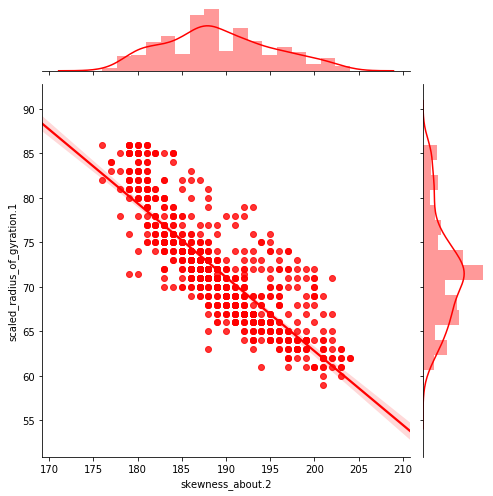

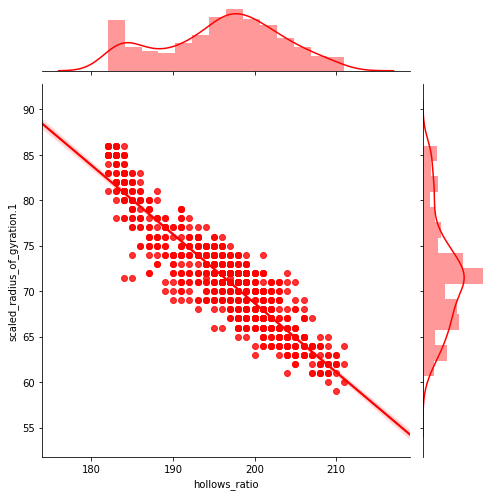

In [29]:
for i in ['skewness_about.2', 'hollows_ratio']:
    sns.jointplot(i, 'scaled_radius_of_gyration.1', data, kind='reg', size=7, color='r')

Observation:
* scaled_radius_of_gyration.1 is negatively corelated to these attributes - 'skewness_about.2', 'hollows_ratio'

# 2.7 Boxplot and violin plot of attribute vs dependent variable

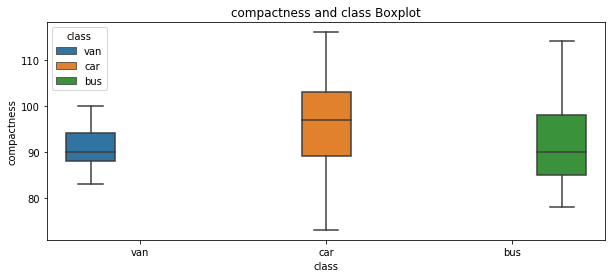

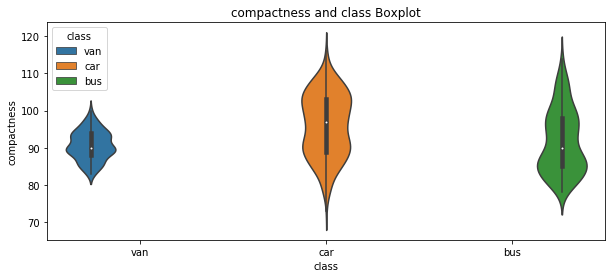

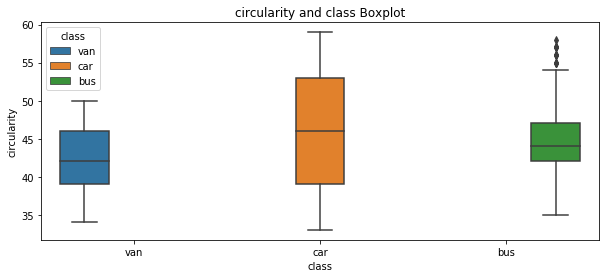

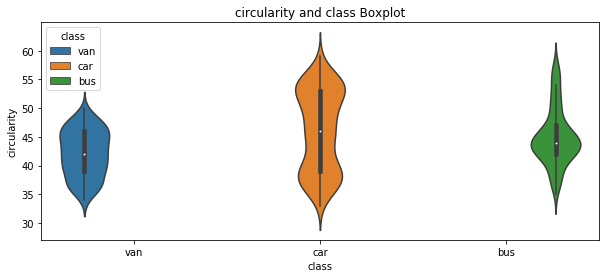

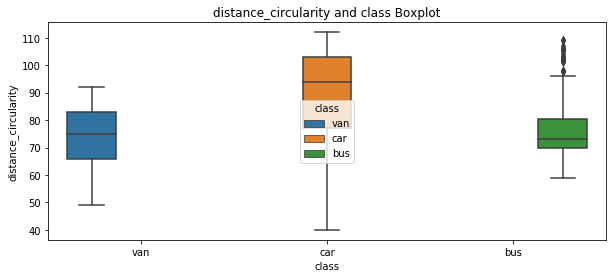

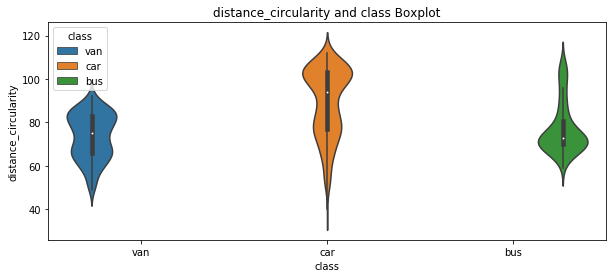

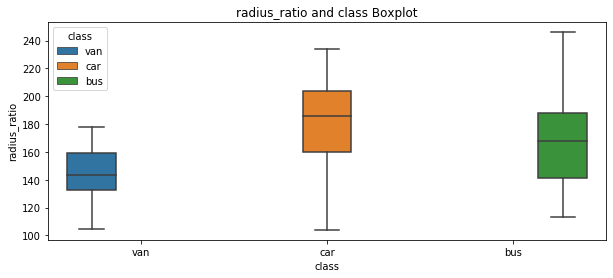

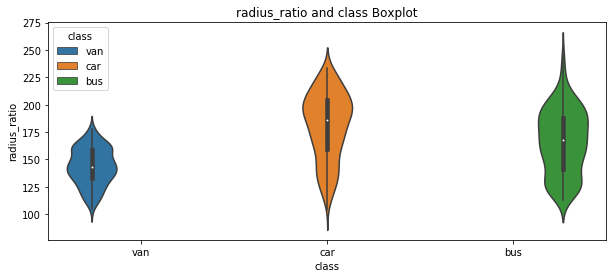

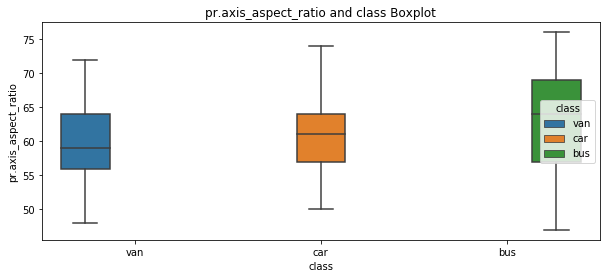

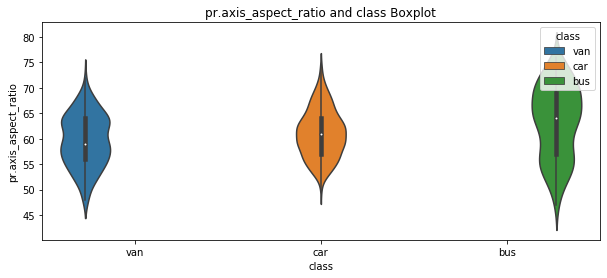

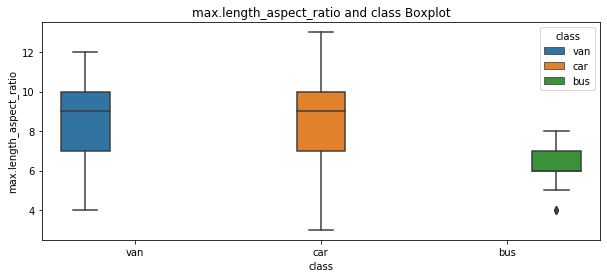

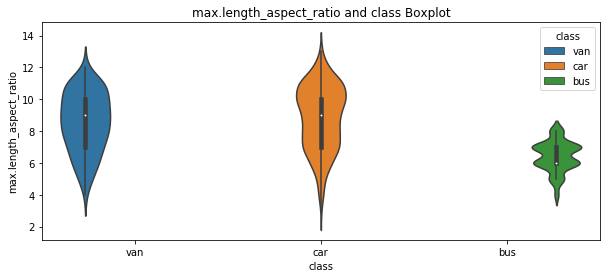

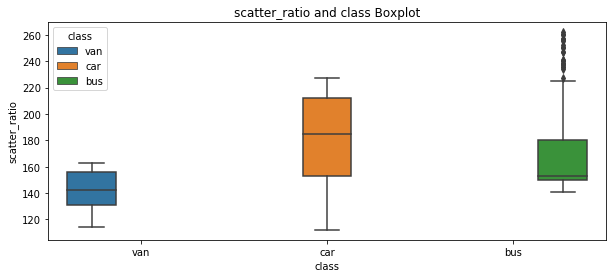

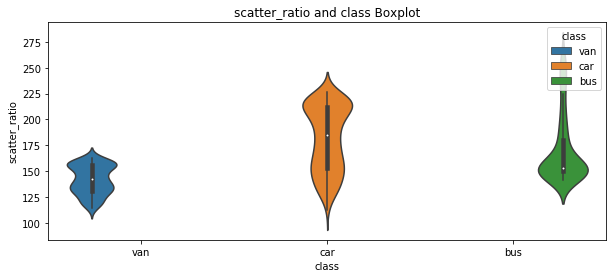

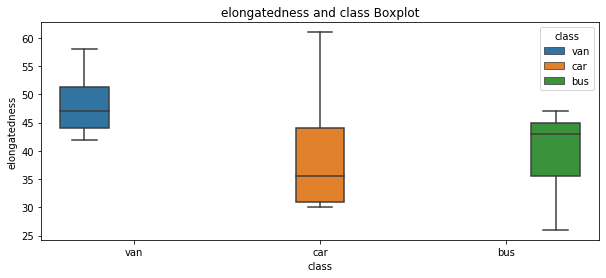

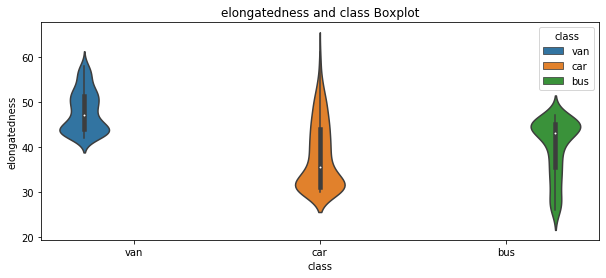

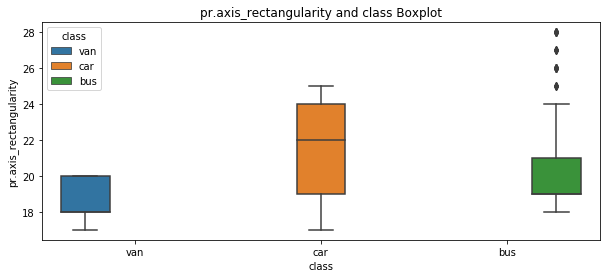

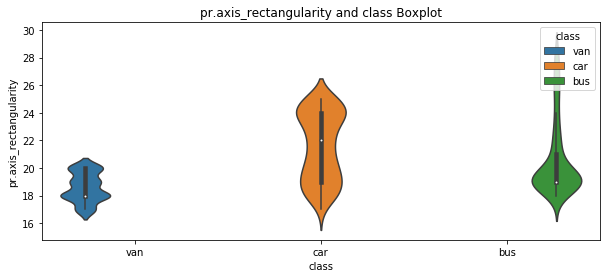

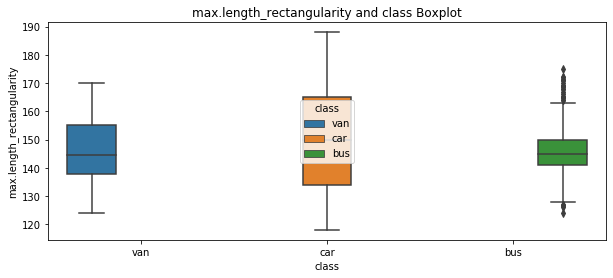

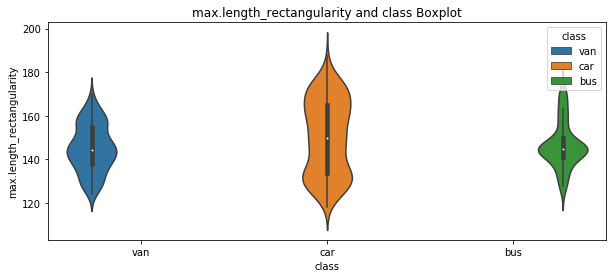

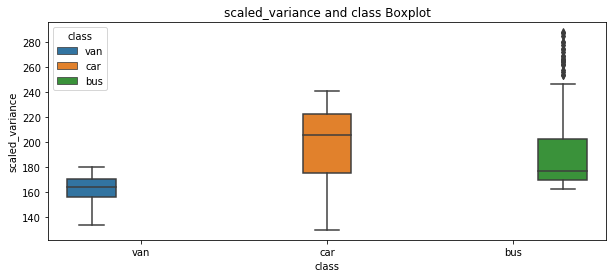

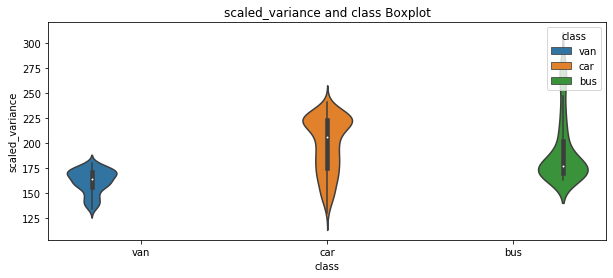

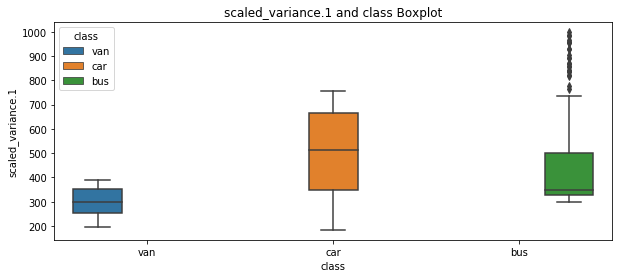

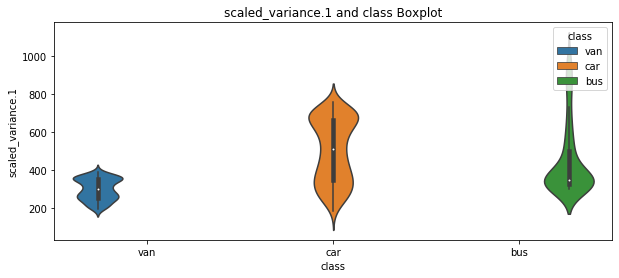

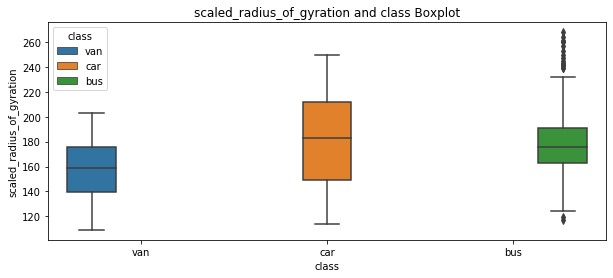

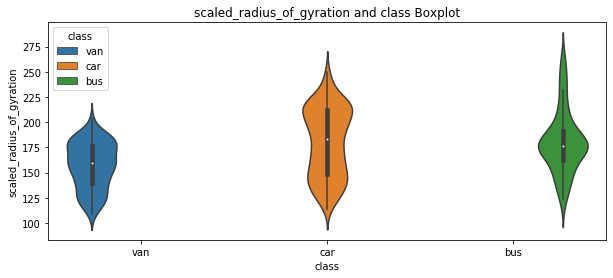

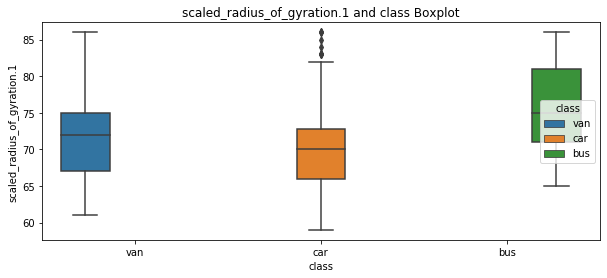

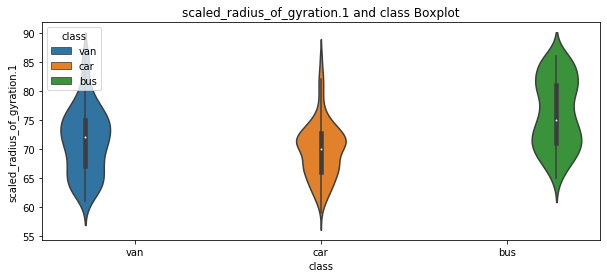

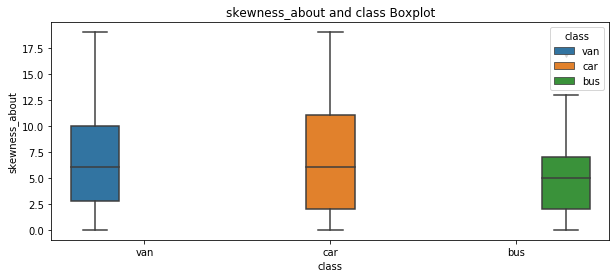

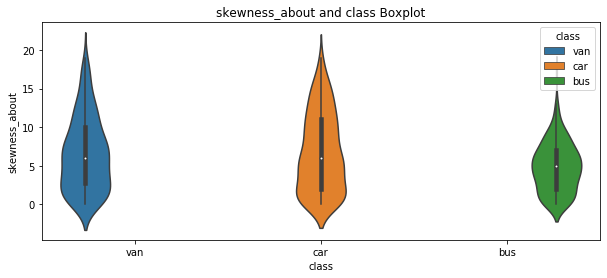

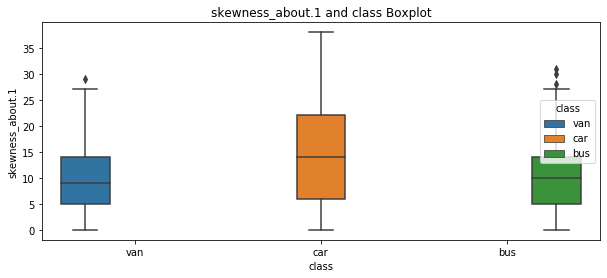

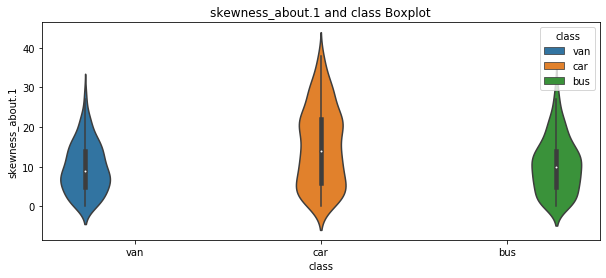

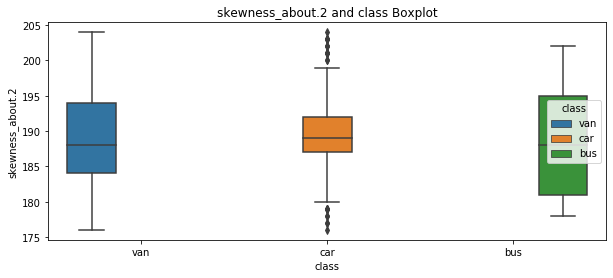

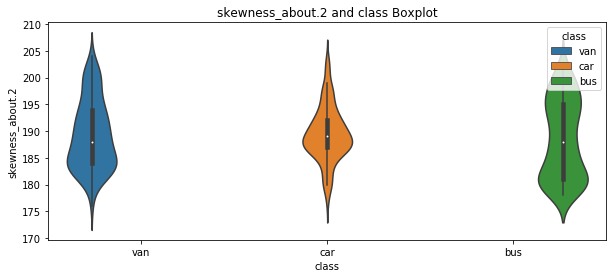

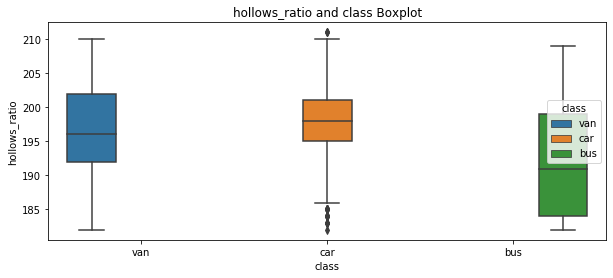

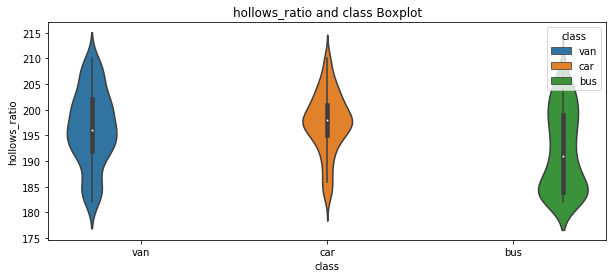

In [30]:
for i in data.columns:
    if i!='class':
        plt.figure(figsize=(10,4))
        plt.title(i+' and class Boxplot')
        sns.boxplot(x='class', y=i, data=data,hue='class')
        plt.show()
        plt.figure(figsize=(10,4))
        plt.title(i+' and class Boxplot')
        sns.violinplot(x='class', y=i, data=data,hue='class')
        plt.show()      

Observation:
* As we can see most of these have an overlap between multio classes ( van, car, bus ) and hence no conclusion can be drawn

# 2.7 Understanding Target Column or Dependent Variable

In [31]:
data['class'].value_counts()

car    410
bus    203
van    188
Name: class, dtype: int64

In [32]:
data['class'].value_counts(normalize = True)*100

car    51.186017
bus    25.343321
van    23.470662
Name: class, dtype: float64

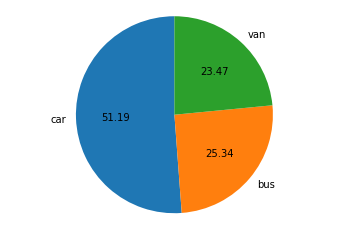

In [33]:
# import the pyplot library
import matplotlib.pyplot as plotter
# The slice names of a population distribution pie chart
pieLabels  = 'car', 'bus', 'van'
# Population data
populationShare     = [410/801, 203/801, 188/801]
figureObject, axesObject = plotter.subplots()
# Draw the pie chart
axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)
# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')
plotter.show()

As we can see, the car:van:bus is almost equal to 2:1:1 and we can treat it as a balanced dataset and hence there is no need of balancing

# 2.8 Feature Importances - choosing carefully which all attributes have to be a part of the analysis

We can get feaure importances using Random Forest


Let us apply random forest and get feature importance so that we can decide whether to keep or delete a particular attribute

In [34]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Divide the dataset into Input features and Target variables
a = data.drop('class', axis=1)
b = data['class']
rf = RandomForestClassifier().fit(a, b)
f_p = rf.feature_importances_
res = list(zip(a.columns, f_p*100))
for i in res:
    print(i)

('compactness', 3.5707198909345697)
('circularity', 3.1165646992048255)
('distance_circularity', 7.7879541266903)
('radius_ratio', 3.195912732569084)
('pr.axis_aspect_ratio', 5.680030200526755)
('max.length_aspect_ratio', 16.366127487306777)
('scatter_ratio', 6.440710200619478)
('elongatedness', 7.400579586191161)
('pr.axis_rectangularity', 2.474508415900726)
('max.length_rectangularity', 6.802322996205438)
('scaled_variance', 9.448090600090186)
('scaled_variance.1', 9.134581385512163)
('scaled_radius_of_gyration', 2.0641797793680223)
('scaled_radius_of_gyration.1', 5.181577736939022)
('skewness_about', 2.0798710361546675)
('skewness_about.1', 2.471133091001078)
('skewness_about.2', 3.19539960616868)
('hollows_ratio', 3.5897364286170657)


Observation:
* As we can see no feature has less than 1 percent importance which indicates that every feature contributes to independent variables
* So we tend to keep all the independent attributes
* max.length_aspect_ratio has the highest feature importance

# 3. Splitting data into Train and Test

In [36]:
#Seperating X and y from data dataframe
X = data.drop(['class'], axis = 1)
y = data['class']

In [37]:
#splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#standarizing train and test
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

# 4. Support Vector Machine

In [38]:
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 0.5,  1, 10, 100, 1000, 10000],  
              'gamma': [10000, 1000, 100, 10, 1, 0.5,  0.1, 0.01, 0.001], 
              'kernel': ['rbf','linear','poly']}  
  
grid = GridSearchCV(SVC(), param_grid, cv=5,verbose = 0) 
  
# fitting the model for grid search 
best_model=grid.fit(x_train, y_train) 

# View best hyperparameters
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])
best_gamma=best_model.best_estimator_.get_params()['gamma']
best_c=best_model.best_estimator_.get_params()['C']
best_kernel=best_model.best_estimator_.get_params()['kernel']
print("Best Score:", best_model.best_score_)

Best gamma: 0.01
Best C: 100
Best kernel: rbf
Best Score: 0.9682935271720318


# 4.1 Fitting with best parameters

In [39]:
svm=SVC(C=best_c,gamma=best_gamma,kernel=best_kernel)
svm.fit(x_train,y_train)
predicted_labels = svm.predict(x_test)
print("Accuracy: ",svm.score(x_test, y_test))
print(" "*100)


Accuracy:  0.9886792452830189
                                                                                                    


In [40]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

print(confusion_matrix(y_test, predicted_labels))

print("Accuracy Score:",accuracy_score(y_test, predicted_labels))


[[ 62   0   0]
 [  0 138   2]
 [  0   1  62]]
Accuracy Score: 0.9886792452830189


In [41]:
target_names = ['car', 'bus','van']
print(" "*100)
print("classification report for test data:")
print(classification_report(y_test, predicted_labels, target_names=target_names))

                                                                                                    
classification report for test data:
              precision    recall  f1-score   support

         car       1.00      1.00      1.00        62
         bus       0.99      0.99      0.99       140
         van       0.97      0.98      0.98        63

    accuracy                           0.99       265
   macro avg       0.99      0.99      0.99       265
weighted avg       0.99      0.99      0.99       265



Observation:
* Accuracy of the best fit model is 98.8 % which indicates that we have did good in our model
* CAr has a very high recall of 1 followed by bus and van

# 5. K - Fold Cross Validation

In [42]:
# we run kfold cross validation with the default parameters 

In [43]:
num_folds = 10
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed)
model = SVC()
model.fit(x_train, y_train)
results = cross_val_score(model, x_test, y_test, cv=kfold)
print(results)
print("max accuracy:", results.max())
print("min accuracy:", results.min())

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.96296296 0.92592593 0.92592593 0.96296296 0.96296296 0.96153846
 0.92307692 0.96153846 0.92307692 0.88461538]
max accuracy: 0.9629629629629629
min accuracy: 0.8846153846153846
Accuracy: 93.946% (2.558%)


In [44]:
# we run kfold cross validation with the best parameters found before

In [45]:
num_folds = 10
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed)
model = SVC(C=best_c,gamma=best_gamma,kernel=best_kernel)
model.fit(x_train, y_train)
results = cross_val_score(model, x_test, y_test, cv=kfold)
print(results)
print("max accuracy:", results.max())
print("min accuracy:", results.min())

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1.         0.96296296 0.96296296 0.96296296 1.         0.96153846
 0.88461538 0.96153846 0.96153846 0.92307692]
max accuracy: 1.0
min accuracy: 0.8846153846153846
Accuracy: 95.812% (3.201%)


# 6. PCA

In [46]:
from scipy import stats
Xscaled = stats.zscore(X)
pca = PCA(n_components=18)
pca.fit(Xscaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
eig_vals, eig_vecs = pca.explained_variance_, pca.components_

Eigen Values

In [48]:
print(pca.explained_variance_)

[9.75765025e+00 3.36945941e+00 1.21426738e+00 1.14979580e+00
 9.03501869e-01 6.67906670e-01 3.28207952e-01 2.28994058e-01
 1.15537802e-01 7.69531835e-02 6.24442718e-02 4.37479763e-02
 2.90198322e-02 2.62231067e-02 1.81665223e-02 1.72666989e-02
 1.02038549e-02 3.15335240e-03]


Eigen Vectors

In [49]:
print(pca.components_)

[[ 2.71453771e-01  2.87606985e-01  3.01420484e-01  2.71094209e-01
   9.44575860e-02  1.92043010e-01  3.11704085e-01 -3.09036120e-01
   3.08912943e-01  2.77286993e-01  3.03889300e-01  3.08251020e-01
   2.64199553e-01 -3.06484691e-02  3.42275835e-02  5.69947609e-02
   2.38325601e-02  7.32928788e-02]
 [-9.49771242e-02  1.28534298e-01 -4.80809772e-02 -2.10677760e-01
  -2.60385155e-01 -9.13293253e-02  6.49283752e-02 -4.21446306e-03
   7.66848949e-02  1.19458682e-01  6.34392185e-02  7.07986042e-02
   2.00702917e-01  5.06117102e-01 -1.04501977e-02 -8.06296772e-02
  -5.04069247e-01 -5.10946362e-01]
 [-2.70544288e-02 -2.13429711e-01  6.60529220e-02  5.69613881e-02
  -8.02982702e-02 -1.75029995e-01  1.13455821e-01 -9.53747540e-02
   1.09394064e-01 -2.31546395e-01  1.51444062e-01  1.17020978e-01
  -2.09524233e-01  7.36490680e-02 -5.25693694e-01  6.73969265e-01
  -5.10372217e-02 -4.82547868e-02]
 [ 1.30694617e-01 -3.09326209e-02  1.13452387e-01 -2.49549586e-01
  -6.08248519e-01  3.20512222e-01 -4.

And the percentage of variation explained by each eigen Vector

In [50]:
print(pca.explained_variance_ratio_)

[5.41414912e-01 1.86958491e-01 6.73750802e-02 6.37977974e-02
 5.01318834e-02 3.70596016e-02 1.82110114e-02 1.27060096e-02
 6.41075332e-03 4.26983956e-03 3.46479522e-03 2.42740887e-03
 1.61020015e-03 1.45502049e-03 1.00799125e-03 9.58063471e-04
 5.66173109e-04 1.74967535e-04]


In [51]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.1414912   72.83734035  79.57484836  85.9546281   90.96781645
  94.67377661  96.49487775  97.7654787   98.40655404  98.83353799
  99.18001751  99.4227584   99.58377841  99.72928046  99.83007959
  99.92588594  99.98250325 100.        ]


In [52]:
count = 0
sum = 0
for i in var_exp:
    if sum<95:
        sum = sum + i
        count = count + 1
print("no fo components req to cover 95 % variance:", count)    

no fo components req to cover 95 % variance: 7


# As we can see if we take 7 components, 96.1 percentage variance is explained

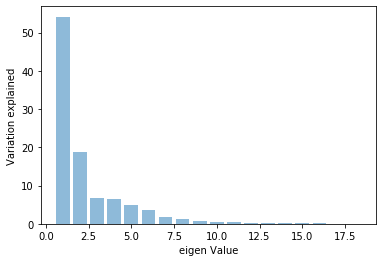

In [53]:
plt.bar(list(range(1,19)),var_exp,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

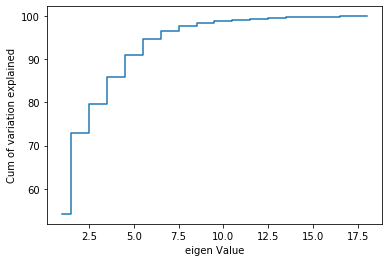

In [54]:
plt.step(list(range(1,19)),cum_var_exp, where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

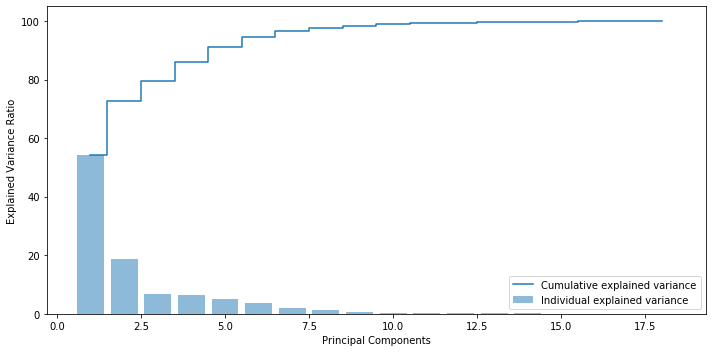

In [55]:
# Ploting 
plt.figure(figsize = (10,5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Dimensionality Reduction - repeat 3, 4 , 5

Now 7 dimensions seems better compared to 18 dimensions. With 7 variables we can explain over 95% of the variation in the original data!

In [56]:
data_new = pd.read_csv("vehicle-1.csv")
nulls = data.isnull().sum()
nulls[nulls > 0]
data_new.fillna(data.median(), inplace=True)
for idx, col in enumerate(data_new.columns[:-1]):
    q1 = data_new[col].quantile(0.25)
    q3 = data_new[col].quantile(0.75)
    low = q1 - 1.5*(q3 - q1)
    high = q3 + 1.5*(q3 - q1)
    data_new = data_new[(data_new[col] < high) & (data_new[col] > low)]
#Seperating X and y from data dataframe
X = data.drop(['class'], axis = 1)
y = data['class']
x_train_pca, x_test_pca, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

x_train_pca = StandardScaler().fit_transform(x_train_pca)
x_test_pca = StandardScaler().fit_transform(x_test_pca)

In [57]:
pca7 = PCA(n_components=7)
pca7.fit(x_train_pca)

x_train_pca = pca7.transform(x_train_pca)
x_test_pca = pca7.transform(x_test_pca)

In [58]:
print("Eigen vectors: ",pca7.components_)
print("Eigen Values: ",pca7.explained_variance_ratio_)

Eigen vectors:  [[ 0.27371218  0.28987911  0.30299252  0.26615482  0.0852644   0.18174073
   0.31351489 -0.31072004  0.31141391  0.27839528  0.30598087  0.30960482
   0.26855606 -0.01367375  0.02624339  0.0534369   0.01061571  0.05781359]
 [-0.0964425   0.11483799 -0.05651776 -0.22561294 -0.27619354 -0.08414752
   0.05768805  0.00732867  0.07042869  0.1138776   0.05477888  0.06527418
   0.18508201  0.50322065 -0.00916474 -0.09190184 -0.50286447 -0.51243691]
 [-0.11360146 -0.15283356 -0.03450791  0.22807565  0.3740152  -0.41214811
   0.0910955  -0.12605572  0.06758127 -0.23515313  0.1663425   0.10105284
  -0.09195369  0.17815973 -0.59992842  0.24769753 -0.00775901 -0.13158639]
 [ 0.06380253 -0.16834478  0.12057722 -0.14651424 -0.47134566  0.1675459
   0.07247555 -0.00794097  0.08889938 -0.10545214  0.04682019  0.06462983
  -0.21400758 -0.04977936 -0.02644266  0.77043631 -0.0757325   0.04851296]
 [ 0.16937837 -0.11766765 -0.06925855  0.08806774  0.02422779 -0.55340527
   0.06864914 -0.04

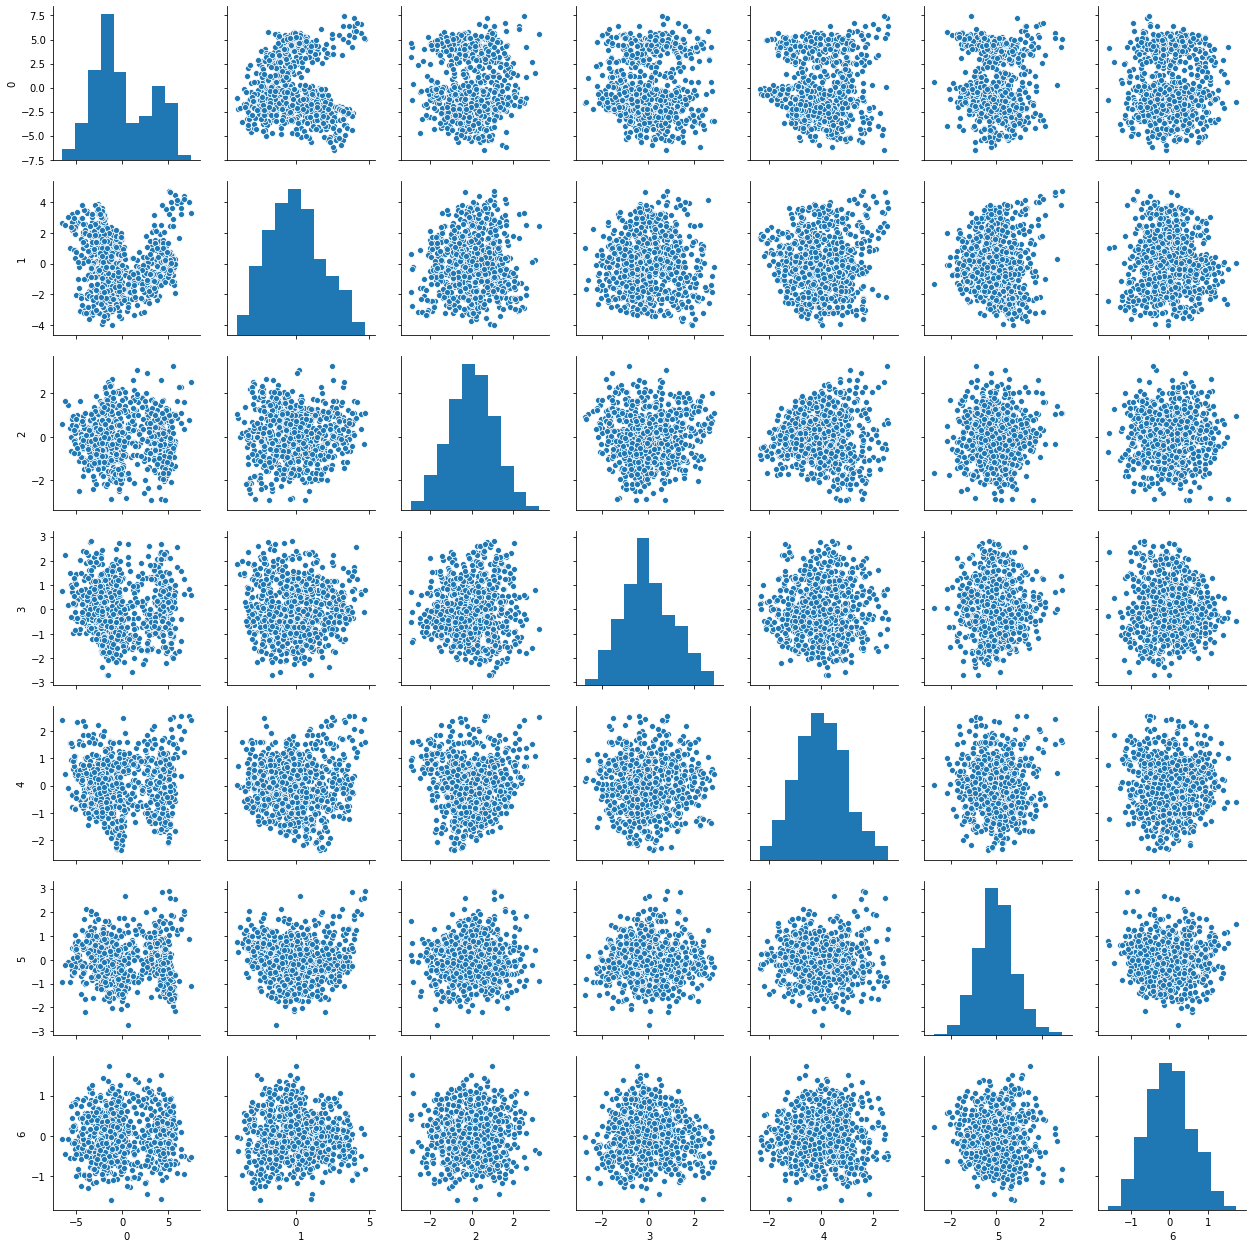

In [59]:
XScaled = stats.zscore(X)
Xpca7 = pca7.transform(XScaled)
sns.pairplot(pd.DataFrame(Xpca7))

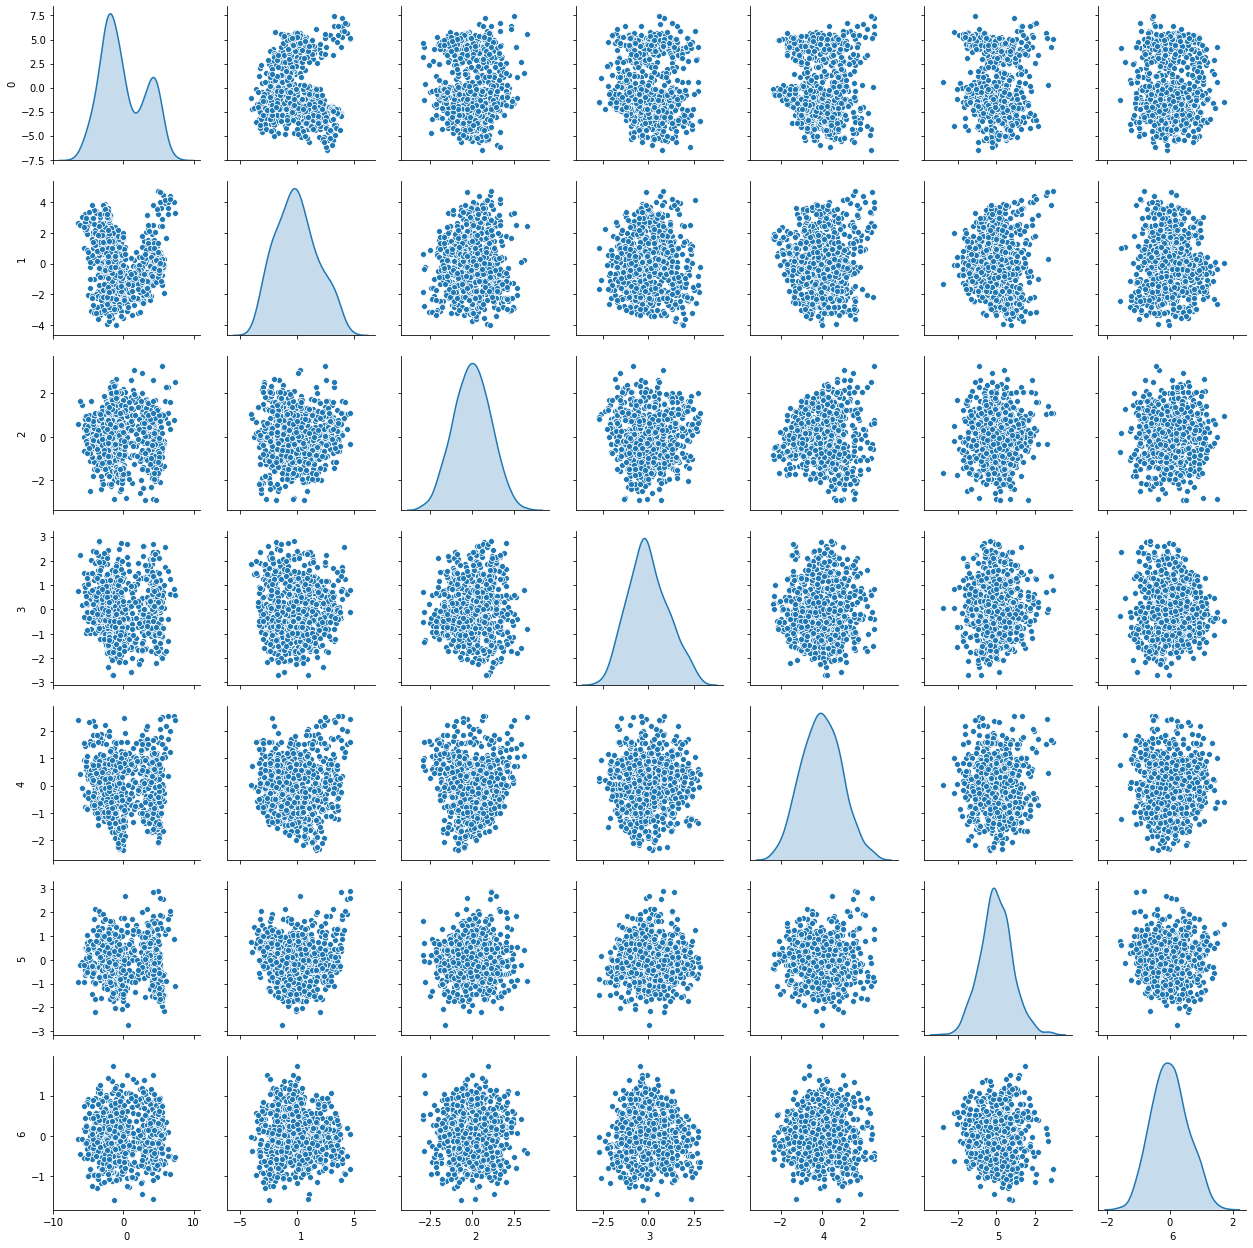

In [60]:
sns.pairplot(pd.DataFrame(Xpca7),diag_kind='kde')

Observation:
* Principal Components are not easily intrepretable as they are cloud shaped

# 7. Support vector Machine using PCA dimensions

# Support Vector Machine

In [61]:
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 0.5,  1, 10, 100, 1000],  
              'gamma': [1000, 100, 10, 1, 0.5,  0.1, 0.01, 0.001], 
              'kernel': ['rbf','linear','poly']}  
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=3)
grid = GridSearchCV(SVC(), param_grid, cv=cv, verbose = 0) 
  
# fitting the model for grid search 
best_model_pca=grid.fit(x_train_pca, y_train) 

# View best hyperparameters
print('Best gamma:', best_model_pca.best_estimator_.get_params()['gamma'])
print('Best C:', best_model_pca.best_estimator_.get_params()['C'])
print('Best kernel:', best_model_pca.best_estimator_.get_params()['kernel'])
best_gamma_pca=best_model_pca.best_estimator_.get_params()['gamma']
best_c_pca=best_model_pca.best_estimator_.get_params()['C']
best_kernel_pca=best_model_pca.best_estimator_.get_params()['kernel']
print("Best Score:", best_model_pca.best_score_)

Best gamma: 0.1
Best C: 10
Best kernel: rbf
Best Score: 0.9197685853576884


# Fitting with best parameters

In [62]:
svm_pca=SVC(C=best_c_pca,gamma=best_gamma_pca,kernel=best_kernel_pca)
svm_pca.fit(x_train_pca,y_train)
predicted_labels = svm_pca.predict(x_test_pca)
print("Accuracy: ",svm_pca.score(x_test_pca, y_test))
print(" "*100)

Accuracy:  0.939622641509434
                                                                                                    


In [63]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

print(confusion_matrix(y_test, predicted_labels))

print("Accuracy Score:",accuracy_score(y_test, predicted_labels))


[[ 60   2   0]
 [  3 132   5]
 [  3   3  57]]
Accuracy Score: 0.939622641509434


In [64]:
target_names = ['car', 'bus','van']
print(" "*100)
print("classification report for test data:")
print(classification_report(y_test, predicted_labels, target_names=target_names))

                                                                                                    
classification report for test data:
              precision    recall  f1-score   support

         car       0.91      0.97      0.94        62
         bus       0.96      0.94      0.95       140
         van       0.92      0.90      0.91        63

    accuracy                           0.94       265
   macro avg       0.93      0.94      0.93       265
weighted avg       0.94      0.94      0.94       265



#  K - Fold Cross Validation with PCA Principal Components

In [65]:
# we run kfold cross validation with the default parameters 

In [66]:
num_folds = 20
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed)
model = SVC()
model.fit(x_train_pca,y_train)
results = cross_val_score(model, x_test_pca, y_test, cv=kfold)
print(results)
print("max accuracy:", results.max())
print("min accuracy:", results.min())

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.92857143 0.85714286 0.92857143 0.92857143 0.92857143 0.84615385
 0.84615385 1.         0.84615385 1.         0.92307692 0.92307692
 1.         0.92307692 1.         1.         0.76923077 0.92307692
 1.         0.76923077]
max accuracy: 1.0
min accuracy: 0.7692307692307693
Accuracy: 91.703% (7.223%)


In [67]:
# we run kfold cross validation with the best parameters found before

In [68]:
num_folds = 20
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed)
model = SVC(C=best_c,gamma=best_gamma,kernel=best_kernel)
model.fit(x_train_pca,y_train)
results = cross_val_score(model, x_test_pca, y_test, cv=kfold)
print(results)
print("max accuracy:", results.max())
print("min accuracy:", results.min())

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.92857143 0.78571429 0.92857143 0.92857143 0.85714286 0.84615385
 0.92307692 1.         0.84615385 1.         0.92307692 0.92307692
 1.         0.92307692 1.         1.         0.92307692 0.84615385
 1.         0.76923077]
max accuracy: 1.0
min accuracy: 0.7692307692307693
Accuracy: 91.758% (7.058%)


# 8. Comparing Models

In [69]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Data", "Accuracy", "gamma", "c", "kernel"]

x.add_row(["SVM", 'Raw', 98.86,best_gamma, best_c, best_kernel])
x.add_row(["SVM", 'PCA', 93.69,best_gamma_pca, best_c_pca, best_kernel_pca])


print(x)
    
x = PrettyTable()

x.field_names = ["Model", "Data", "Accuracy", "gamma", "c", "kernel"]

x.add_row(["SVM with 10 fold", 'Raw - Default parameters of SVM', 93.94, best_gamma, best_c, best_kernel])
x.add_row(["SVM with 10 fold", 'Raw - Best parameters of SVM', 95.81,1,1,'rbf'])
x.add_row(["SVM with 10 fold", 'PCA - Default parameters of SVM', 91.07, best_gamma_pca, best_c_pca, best_kernel_pca])
x.add_row(["SVM with 10 fold", 'PCA - Best parameters of SVM', 91.75,1,1,'rbf'])


print(x)

+-------+------+----------+-------+-----+--------+
| Model | Data | Accuracy | gamma |  c  | kernel |
+-------+------+----------+-------+-----+--------+
|  SVM  | Raw  |  98.86   |  0.01 | 100 |  rbf   |
|  SVM  | PCA  |  93.69   |  0.1  |  10 |  rbf   |
+-------+------+----------+-------+-----+--------+
+------------------+---------------------------------+----------+-------+-----+--------+
|      Model       |               Data              | Accuracy | gamma |  c  | kernel |
+------------------+---------------------------------+----------+-------+-----+--------+
| SVM with 10 fold | Raw - Default parameters of SVM |  93.94   |  0.01 | 100 |  rbf   |
| SVM with 10 fold |   Raw - Best parameters of SVM  |  95.81   |   1   |  1  |  rbf   |
| SVM with 10 fold | PCA - Default parameters of SVM |  91.07   |  0.1  |  10 |  rbf   |
| SVM with 10 fold |   PCA - Best parameters of SVM  |  91.75   |   1   |  1  |  rbf   |
+------------------+---------------------------------+----------+------

# 9. Conclusions

* Removed around 40 outliers but our SVM models captured a lot of information with the best parameters
* We have caluclated corelation matrix and found which attributes are related or not
* Then we have used Random Forest to get the feature importance and have observed that to keep all the independent attributes
* We have split the data into train and test with a random_state = 42 and got test accuracy of 98.86 
* We have done k fold Cross validation where k = 40
* we did PCA and found that 7 principal components are enough to cover 95 % variance
* We have then used these 7 principal Components and applied Svm to get a test accuracy of 93.7 
* We got 93.7 % accuracy with only 7 dimensions instead of 98.8 with 18 dimensions

* PCA Components are not intrepretable as these are linear combinations of raw data